# Angle Optimization
## Optimizing combination of t1 and t3
Abby Bechtel

In [2]:
import interferometer as ir
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# Set default plot line color cycling
plt.rcParams.update(plt.rcParamsDefault)
ccycle = mpl.cycler('color', plt.cm.rainbow(np.linspace(0.1, 2.9, 30)))
plt.rc('axes', prop_cycle = ccycle)

# Allow fancy axis number formatting
from matplotlib.ticker import EngFormatter, ScalarFormatter

# Set stylesheet for plots
plt.style.use("seaborn-pastel")
mpl.style.use('bmh')

In [4]:
def make_plots(t1, t3, t2min, t2max, ymax=None):
    """Show stacked horizontal, vertical, and split intensity plots for selected angle ranges.
    
    Parameters:
    -----------
        t1 : float
            rotation angle of 1st half wave plate in clockwise direction
        t3 : float
            rotation angle of 3rd half wave plate in clockwise direction
        t2min : float
             minimum angle to show for the middle imperfect polarizer
        t2max : float
             maximum angle to show for the middle imperfect polarizer
    
    Keyword Arguments:
    ------------------
        ymax : float (None)
            if defined, set vertical axis of intensity plot
    """
    
    # Dark-port polarization intensities
    t2s, h = ir.intensity(t1,t3,0,t2min,t2max)
    _  , v = ir.intensity(t1,t3,90,t2min,t2max)
    
    # Split-detected signal
    s = (h - v)/(h + v)
    
    # Set up plot axes
    fig, axes = plt.subplots(2, sharex=True, figsize=(6,7), dpi=100)
    plt.rc('font', family='serif')
    axes[0].set_prop_cycle(ccycle)
    
    # Upper Plot (intensities)
    axes[0].grid(True)
    axes[0].plot(t2s, h, label="H")
    axes[0].plot(t2s, v, label="V")
    axes[0].plot(t2s, np.zeros_like(t2s), color="black")
    # Format axis ticks nicely
    formatter0 = EngFormatter(places=2, sep="\N{THIN SPACE}", usetex=True, unit="")
    axes[0].yaxis.set_major_formatter(formatter0)
    axes[0].set_title("Dark Port Polarization Intensities")
    axes[0].set_ylabel(r"Intensity Fraction: $I/I_0$")
    # Label curves in plot
    axes[0].legend()
    # Annotate extra information
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
    axes[0].text(0.87, 0.75, r"$\theta_1 = ${}$^\circ$".format(t1), ha="left", va="center", size=8,
        bbox=bbox_props, transform=axes[0].transAxes)
    axes[0].text(0.87, 0.65, r"$\theta_3 = ${}$^\circ$".format(t3), ha="left", va="center", size=8,
        bbox=bbox_props, transform=axes[0].transAxes)
    axes[0].text(0.87, 0.55, r"$\mathrm{P}_{\mathrm{in}} = \mathrm{H}$", ha="left", va="center", size=8,
        bbox=bbox_props, transform=axes[0].transAxes)
    axes[0].text(0.87, 0.45, r"$\eta^2_{\mathrm{leak}} = 1\%$", ha="left", va="center", size=8,
        bbox=bbox_props, transform=axes[0].transAxes)
    if ymax:  # Set y limit only if requested
        axes[0].set_ylim(0, ymax)
        
    # Lower Plot (split-detection)
    axes[1].plot(t2s, s)
    # include reference horizontal lines
    axes[1].plot(t2s, np.zeros_like(t2s), color="gray", linestyle="--", linewidth=1)
    axes[1].plot(t2s, np.ones_like(t2s), color="black", linewidth=1)
    axes[1].plot(t2s, -np.ones_like(t2s), color="black", linewidth=1)
    axes[1].grid(True)
    axes[1].set_title("Normalized Split-Detected Signal")
    axes[1].set_xlabel(r"Polarizer Rotation Angle: $\theta\;[^\circ]$")
    axes[1].set_ylabel(r"Signal: $S(\theta) = (I_H - I_V)/(I_H + I_V)$")
    # Format label ticks nicely
    formatter1 = EngFormatter(places=2, sep="", useMathText=True, unit="")
    formatter2 = ScalarFormatter(useMathText=True)
    axes[1].xaxis.set_major_formatter(formatter1)
    axes[1].yaxis.set_major_formatter(formatter2)
    axes[1].set_ylim(-1.05,1.05)
    fig.tight_layout()
    fig.align_ylabels(axes[:])
    plt.show()

## Taking gradient

### Function to take the gradient of x array

In [3]:
def gradient(x):
    n=len(x)
    d = np.eye(n,n,1)-np.eye(n,n,-1)
    d[0][0:2]=np.array([[-2,2]])
    d[n-1,n-2:n]=np.array([[-2,2]])
    D=d/(2*(max(x)-min(x))/(len(x)-1))
    return D

### Function to

In [5]:
def get_points(d1,d2):
    l = []
    for i in range(len(d1)):
        if d1[i] != 0:
            if abs(d1[i] - d2[i]) <= 0.000001:
                l.append(d1[i])
    return l

### Function to graph the 1st and 2nd derivative

In [6]:
def graph(fx, xpoints):
    yDeriv1 = gradient(xpoints)@fx
    yDeriv2 = gradient(xpoints)@yDeriv1
    yFunc = fx
    p = get_points(yDeriv1,yDeriv2)
    
    f = plt.figure(figsize=(8,8))
    a = plt.axes()
    # Explicitly plot matched pairs of x-y points on the axis a
    a.plot(xpoints, yFunc, label="$f(x)$")
    # Explicitly plot different matched pair of x-y points in a different color
    a.plot(xpoints, yDeriv1, color="Red", label="$f^ {'}(x)$")
    # Explicitly plot different matched pair of x-y points in a different color
    a.plot(xpoints, yDeriv2, color="Green", label="$f^ {''}(x)$")
    # Explicitly set axis labels and a plot title
    a.set(xlabel="Domain", ylabel="Range", title="Derivative Approximation")
    # Add a legend describing which curve is which
    a.legend()
    # Show the active plot to the screen
    plt.show()
#     return yDeriv1, yDeriv2

### Testing with set angles

In [7]:
# set angles for testing 
t1 = 30
t3 = 180
t2min = 0
t2max = 180

In [9]:
t2s, h = ir.intensity(t1,t3,0,t2min,t2max) # domain and horizontal
_  , v = ir.intensity(t1,t3,90,t2min,t2max) # vertical

# Split-detected signal
s = (h - v)/(h + v)

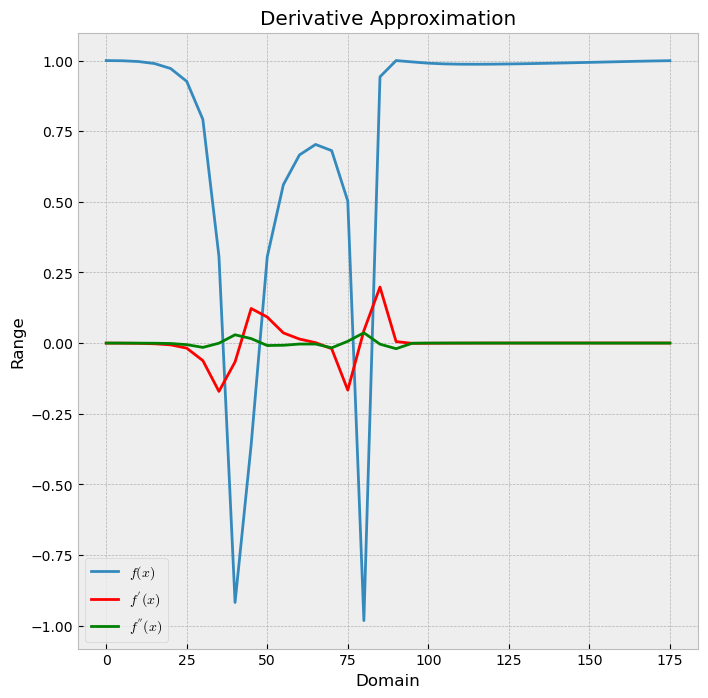

In [10]:
graph(s,t2s)

### Iterating through all possible combintations of t1 and t3

In [11]:
# return max slope for all combinations of polarizer 1 and 2 angles within x array
def test_slopes(x):
    slope_map = {}
    
    # i is first elements (halfwaveplate setup) - t1
    for i in x:
        # j is third elements (halfwaveplate setup) - t3
        for j in x:
            # Dark-port polarization intensities
            t2s, h = ir.intensity(i,j,0,0,180)
            _  , v = ir.intensity(i,j,90,0,180)

            # Split-detected signal
            s = (h - v)/(h + v)
            
            # gradient array over domain
            grad_arr = np.abs(gradient(t2s)@s)
            # returning either max 5 slopes for i,j polarization combination or simply 1 max slope
#             ind_max5 = np.argpartition(grad_arr, -5)[-5:]
            ind_max = np.argpartition(grad_arr, -1)[-1:]
            # creating dictionary with (i,j) key and value of the max slope value and the index
            slope_map[(i,j)]=(grad_arr[ind_max],t2s[ind_max])
    return slope_map

In [12]:
domain = np.linspace(0,90,91)
slope_dict = test_slopes(domain)

<ipython-input-11-60f87132ce19>:14: RuntimeWarning: invalid value encountered in true_divide
  s = (h - v)/(h + v)


In [19]:
# get 5 max slopes from all combinations in max_slope dictionary
keys, values = zip(*slope_dict.items())
# get slopes from tuple containing slopes and indexes for slopes
slopes = np.array([tuple[0][0] for tuple in values])
slopes  = slopes[~np.isnan(slopes)]
# get max 5 slopes
ind_max = np.argpartition(slopes, -10)[-10:]
# print(ind_max)
# max 5 slopes for all combinations of i,j
max_slopes = slopes[ind_max]

In [20]:
p1p3_combination = []
p1p3_angles = []
# get the combinations of polarizers corrisponding to max slopes
for i in keys:
    for j in max_slopes:
        if slope_dict[i][0][0] == j:
            t1,t3 = i
            p1p3_combination.append([t1,t3,j])

In [21]:
pd.set_option("display.precision", 8)

In [22]:
df = pd.DataFrame(p1p3_combination, columns=['t1', 't3', 'max_slope'])

In [23]:
df = df.drop_duplicates()

In [24]:
df.sort_values(by=['max_slope'], ascending=False).reset_index(drop=True)

,t1,t3,max_slope
0,34.0,59.0,0.39999999
1,59.0,34.0,0.39999999
2,39.0,51.0,0.39999977
3,51.0,39.0,0.39999977
4,36.0,56.0,0.39999173
5,56.0,36.0,0.39999173
6,54.0,62.0,0.39997678
7,62.0,54.0,0.39997678
8,25.0,38.0,0.39996042
9,38.0,25.0,0.39996042


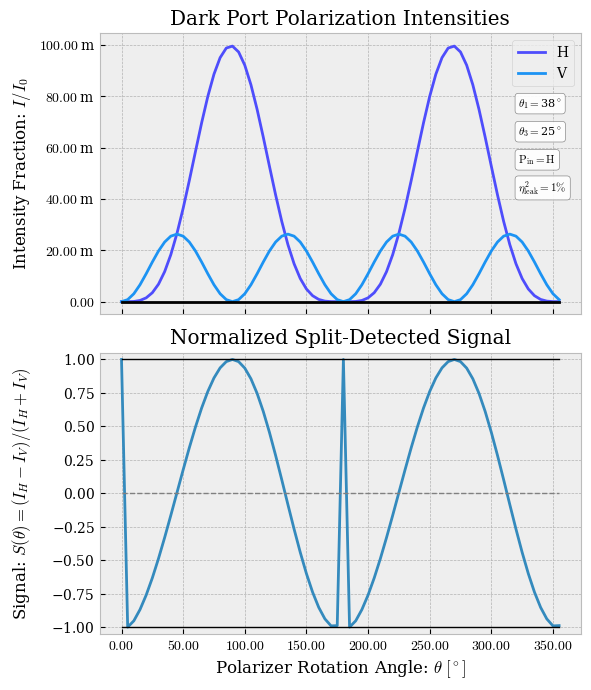

In [30]:
make_plots(38,25,0,360)

In [62]:
t1 = 149
t3 = 124
t2min = 0
t2max = 180

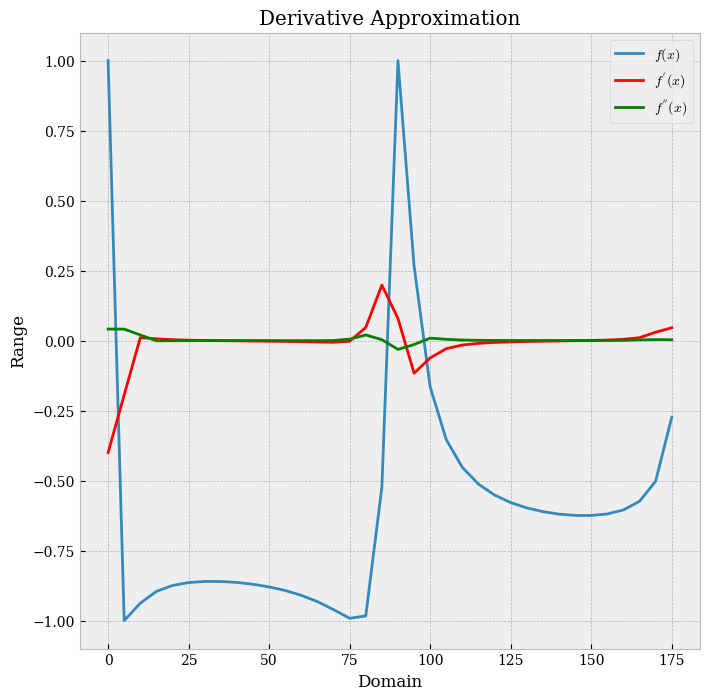

(array([-3.99999994e-01, -1.93774642e-01,  1.04330933e-02,  6.31679728e-03,
         3.14178499e-03,  1.43818122e-03,  3.88020299e-04, -3.64734855e-04,
        -9.91338033e-04, -1.59179906e-03, -2.24066168e-03, -3.00761374e-03,
        -3.95967613e-03, -5.10241131e-03, -5.95548034e-03, -2.25752152e-03,
         4.67655867e-02,  1.98343744e-01,  7.90356072e-02, -1.16545446e-01,
        -6.20037160e-02, -2.87565787e-02, -1.58756703e-02, -9.86169506e-03,
        -6.59113642e-03, -4.59097375e-03, -3.23602479e-03, -2.21660146e-03,
        -1.34914886e-03, -4.90786788e-04,  5.22630953e-04,  1.97155712e-03,
         4.51493548e-03,  1.02616350e-02,  3.00080684e-02,  4.56715350e-02]),
 array([ 0.04124507,  0.04104331,  0.02000914, -0.00072913, -0.00048786,
        -0.00027538, -0.00018029, -0.00013794, -0.00012271, -0.00012493,
        -0.00014158, -0.0001719 , -0.00020948, -0.00019958,  0.00028449,
         0.00527211,  0.02006013,  0.003227  , -0.03148892, -0.01410393,
         0.00877889,  

In [32]:
t2s, h = ir.intensity(t1,t3,0,t2min,t2max) # domain and horizontal
_  , v = ir.intensity(t1,t3,90,t2min,t2max) # vertical

# Split-detected signal
s = (h - v)/(h + v)
graph(s,t2s)